## Objective:

To analyse heart disease in other to discovered trends and patterns


# Methods
* 1. Import tools
  2. Load datasets
  3. Perform EDA - Exploratory Data Analysis

### Data Dictionary

About this file
Attribute Information:

* age
* sex
* chest pain type (4 values)
resting blood pressure
* serum cholestoral in mg/dl
fasting blood sugar > 120 mg/dl
* resting electrocardiographic results (values 0,1,2)
* maximum heart rate achieved
exercise induced angina
* oldpeak = ST depression induced by exercise relative to rest
* the slope of the peak exercise ST segment
number of major vessels (0-3) colored by flourosopy
* thal: 0 = normal; 1 = fixed defect; 2 = reversable defect

age     (se
   sex (1 = male; 0 = female)        (:
   chest pain type
  1: typical angina
e 2: atypical anginaue 3: non-anginal painlue 4: asymptomat
   . #10 (t
    resting blood pressure (in mm Hg on admission to the hospital)
    
5. #
   serum cholestoral in mg/dlol 6.
   fasting blood sugar (>120 mg/dl)  (1 = true; 0 = false)(
   s  7. #1
     resting electrocardiographic results
  0: normal
e 1: having ST-T wave abnormality (T wave inversions and/or ST elevation or depression of > 0.05 mV)ue 2: showing probable or definite left ventricular hypertrophy by Estes' criteri
  a2     8
    maximum heart rate achieved
     3    
    exercise induced angina (1 = yes; 0 = no) 
    34      
    ST depression induced by exercise relative to rest
    .5)   
    the slope of the peak exercise ST segment
  1: upsloping
e 2: flatue 3: downslopin
   01
    number of major vessels (0-3) colored by flourosopy     1417
    3 = normal; 6 = fixed defect; 7 = reversable defect 

     2#1
    diagnosis of heart disease (angiographic disease status)
  0: < 50% diameter narrowing
e 1: > 50% diameter narrowing) 
   14.ed attribute)

### Import tools

In [1]:
# Imports modules
import pandas as pd,\
seaborn as sns,\
matplotlib.pyplot as plt,\
numpy as np

### Load / Read dataset

In [2]:
df = pd.read_csv('heart-disease.csv')

### Perform EDA 

In [3]:
# Get head
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [4]:
# Check tail
df.tail()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
298,57,0,0,140,241,0,1,123,1,0.2,1,0,3,0
299,45,1,3,110,264,0,1,132,0,1.2,1,0,3,0
300,68,1,0,144,193,1,1,141,0,3.4,1,2,3,0
301,57,1,0,130,131,0,1,115,1,1.2,1,1,3,0
302,57,0,1,130,236,0,0,174,0,0.0,1,1,2,0


In [5]:
# Check for null
df.isnull().sum()

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64

In [6]:
# Check for duplicates
df.duplicated().value_counts()

False    302
True       1
Name: count, dtype: int64

In [7]:
# Get duplicated dataset
df[df.duplicated()]

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
164,38,1,2,138,175,0,1,173,0,0.0,2,4,2,1


In [8]:
# Drop duplicates
df.drop_duplicates(inplace=True)

In [9]:
# Comfirm duplicate drop
df.duplicated().sum()

0

In [10]:
# sex vs target (have heart disease or not)
pd.crosstab(df.sex, df.target)

target,0,1
sex,,
0,24,72
1,114,92


Text(0, 0.5, 'Count')

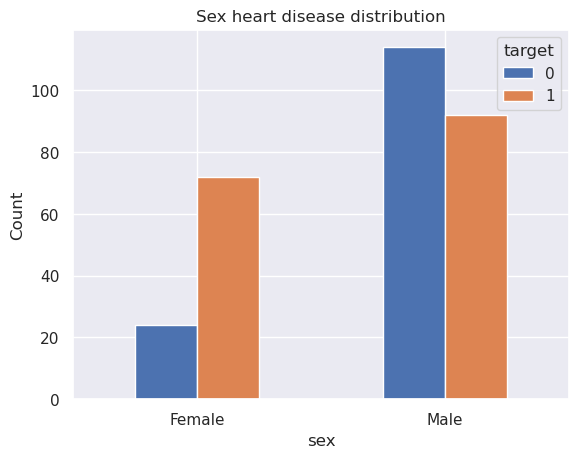

In [11]:
sns.set_theme(style='darkgrid')
pd.crosstab(df.sex, df.target).plot(kind='bar')
plt.xticks(ticks=[0, 1], labels=['Female', 'Male'], rotation=0)
plt.title('Sex heart disease distribution')
plt.ylabel('Count')

In [12]:
# Sex ration
df.sex.value_counts().reset_index()

,sex,count
0,1,206
1,0,96


In [13]:
pd.crosstab(df.cp, df.sex)

sex,0,1
cp,,
0,39,104
1,18,32
2,35,51
3,4,19


Text(0, 0.5, 'Count')

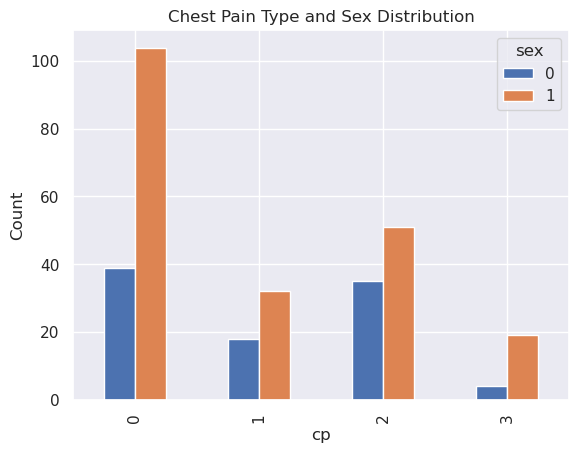

In [14]:
pd.crosstab(df.cp, df.sex).plot(kind='bar')
plt.title('Chest Pain Type and Sex Distribution')
plt.ylabel('Count')

In [15]:
pd.crosstab(df.age, df.sex)

sex,0,1
age,,
29,0,1
34,1,1
35,1,3
37,1,1
38,0,2
39,2,2
40,0,3
41,4,6
42,2,6


In [16]:
pd.crosstab(df.target, df.slope).T

target,0,1
slope,,
0,12,9
1,91,49
2,35,106


In [17]:
pd.crosstab(df.age, df.target)

target,0,1
age,,
29,0,1
34,0,2
35,2,2
37,0,2
38,1,1
39,1,3
40,2,1
41,1,9
42,1,7


In [18]:
# Check correlation
df.corr()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
age,1.000000,-0.094962,-0.063107,0.283121,0.207216,0.119492,-0.111590,-0.395235,0.093216,0.206040,-0.164124,0.302261,0.065317,-0.221476
sex,-0.094962,1.000000,-0.051740,-0.057647,-0.195571,0.046022,-0.060351,-0.046439,0.143460,0.098322,-0.032990,0.113060,0.211452,-0.283609
cp,-0.063107,-0.051740,1.000000,0.046486,-0.072682,0.096018,0.041561,0.293367,-0.392937,-0.146692,0.116854,-0.195356,-0.160370,0.432080
trestbps,0.283121,-0.057647,0.046486,1.000000,0.125256,0.178125,-0.115367,-0.048023,0.068526,0.194600,-0.122873,0.099248,0.062870,-0.146269
chol,0.207216,-0.195571,-0.072682,0.125256,1.000000,0.011428,-0.147602,-0.005308,0.064099,0.050086,0.000417,0.086878,0.096810,-0.081437
fbs,0.119492,0.046022,0.096018,0.178125,0.011428,1.000000,-0.083081,-0.007169,0.024729,0.004514,-0.058654,0.144935,-0.032752,-0.026826
restecg,-0.111590,-0.060351,0.041561,-0.115367,-0.147602,-0.083081,1.000000,0.041210,-0.068807,-0.056251,0.090402,-0.083112,-0.010473,0.134874
thalach,-0.395235,-0.046439,0.293367,-0.048023,-0.005308,-0.007169,0.041210,1.000000,-0.377411,-0.342201,0.384754,-0.228311,-0.094910,0.419955
exang,0.093216,0.143460,-0.392937,0.068526,0.064099,0.024729,-0.068807,-0.377411,1.000000,0.286766,-0.256106,0.125377,0.205826,-0.435601
oldpeak,0.206040,0.098322,-0.146692,0.194600,0.050086,0.004514,-0.056251,-0.342201,0.286766,1.000000,-0.576314,0.236560,0.209090,-0.429146


Text(0.5, 1.0, 'Correlation of Features and Target Vector')

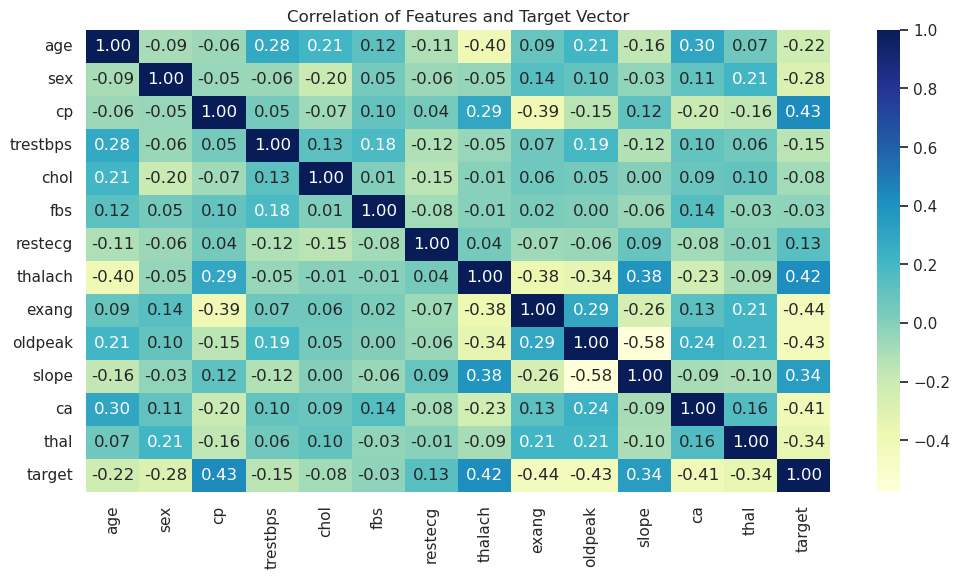

In [19]:
plt.figure(figsize=(12, 6))
sns.heatmap(df.corr(),
           cmap='YlGnBu',
           annot=True,
           fmt='.2f')
plt.title('Correlation of Features and Target Vector')

### Futher Analysis

## Data Science Application

*Import machine learning models algorithms using scikit learn*

#### Problem Set

This is a supervised classification tasks:

* We have features matrix and labelled target vector
* The target vector is discrete
* It is a binary task (Yes/No, 1/0, True/False etc)



### Tool Sets
* 1. LogisticRegression
  2. RandomForestClassifier
  3. KNeighborClassifier
 
There are other ML models for classification tasks, but I chose to experiment with these three.

In [20]:
# Import those models
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression

# Import dataset auto splitter
from sklearn.model_selection import train_test_split

#### Prepare Data for modelling

--into Feature matrix and target vector.

--then into training and testing data sets

In [21]:
# Features Matrix -- Independent Variables
X = df.drop('target', axis=1)

# Target Vector/Array -- Dependent Variable
y = df['target']

In [22]:
# Split X and y into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X,
                                                   y,
                                                   random_state=42)

In [23]:
# Check X_train and y_train lengths
X_train.shape, y_train.shape

((226, 13), (226,))

In [24]:
# Check X_test and y_test lengths
X_test.shape, y_test.shape

((76, 13), (76,))

In [25]:
# Initialise KNeighborsClassifier


In [26]:
# Using function for fiting
models = {
    'Log': LogisticRegression(),
    'knn': KNeighborsClassifier(),
    'rand': RandomForestClassifier()
}
def fit_score_model(models, x_train, x_test, y_train, y_test):
    """
        Fit a model:

        models: ML models
        x_train: training Feature matrix
        x_test: testing feature matrix
        y_train: training target vector
        y_test: testing target vector
    """
    model_scores = {}
    for key, model in models.items():
        model.fit(x_train, y_train)
        score = model.score(x_test, y_test)
        model_scores[key] = score
    return model_scores

fit_score_model(models=models,
               x_train=X_train,
               x_test=X_test,
               y_train=y_train,
               y_test=y_test)


/data/data/com.termux/files/usr/lib/python3.11/site-packages/sklearn/linear_model/_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


{'Log': 0.8421052631578947,
 'knn': 0.6842105263157895,
 'rand': 0.868421052631579}

### Hyper-Parameter Turning

The first score result of a model can be improved upon through tuning its parameters.

First, we turn each of the used models:
1. LogisticRegression
2. RandomForestClassifier
3. KNeighborsClassifier

Using:
* RandomizedSearchCV
* GridSearchCV


### Import auto tuning tools

In [27]:
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV

In [28]:
%%time 
# Tune KNeighborsClassifier
knn_tune = {
    'n_neighbors': np.arange(1, 21),
    'leaf_size': np.arange(1, 31),
    'weights': ['uniform','distance'],
}
kn_rs = RandomizedSearchCV(KNeighborsClassifier(),
                          param_distributions=knn_tune,
                          cv=5,
                           random_state=42
                          )
kn_rs.fit(X_train, y_train)

CPU times: user 2.34 s, sys: 96.7 ms, total: 2.43 s
Wall time: 2.47 s


RandomizedSearchCV(cv=5, estimator=KNeighborsClassifier(),
                   param_distributions={'leaf_size': array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
       18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30]),
                                        'n_neighbors': array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
       18, 19, 20]),
                                        'weights': ['uniform', 'distance']},
                   random_state=42)

In [29]:
kn_rs = kn_rs.score(X_test, y_test)
kn_rs

0.6973684210526315

In [30]:
%%time
# Tune RandomForstClassifier
r_tunes = {
    'n_estimators': np.arange(1, 121),
    'max_depth': np.arange(1, 51),
    'min_samples_split': np.arange(2, 50, 2),
    'min_samples_leaf': np.arange(1, 50, 2)
}

r_rs = RandomizedSearchCV(RandomForestClassifier(),
                         param_distributions=r_tunes,
                         cv=5,
                         random_state=42)
r_rs.fit(X_train, y_train)

CPU times: user 31.1 s, sys: 872 ms, total: 32 s
Wall time: 32.5 s


RandomizedSearchCV(cv=5, estimator=RandomForestClassifier(),
                   param_distributions={'max_depth': array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
       18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34,
       35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50]),
                                        'min_samples_leaf': array([ 1,  3,  5,  7,  9, 11, 13, 15, 17, 19, 21, 23, 25, 27, 29, 31, 33,
       35, 37, 39, 41, 43, 45, 47, 49]),
                                        'min_sampl...
        14,  15,  16,  17,  18,  19,  20,  21,  22,  23,  24,  25,  26,
        27,  28,  29,  30,  31,  32,  33,  34,  35,  36,  37,  38,  39,
        40,  41,  42,  43,  44,  45,  46,  47,  48,  49,  50,  51,  52,
        53,  54,  55,  56,  57,  58,  59,  60,  61,  62,  63,  64,  65,
        66,  67,  68,  69,  70,  71,  72,  73,  74,  75,  76,  77,  78,
        79,  80,  81,  82,  83,  84,  85,  86,  87,  88,  89,  90,  91,
        92,  93,  94,  95,  96,  97,  98,  99, 100, 101, 102, 103, 104,
       105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116, 117,
       118, 119, 120])},
                   random_state=42)

In [31]:
r_rs = r_rs.score(X_test, y_test)
r_rs

0.868421052631579

In [32]:
from warnings import filterwarnings
filterwarnings(action='ignore')

In [56]:
%%time
# Tune LogisticRegression
log_tunes = {
    'penalty': ['l1', 'l2', 'elasticnet'],
    'solver': ['lbfgs', 'newton-cg', 'newton-cholesky', 'liblinear', 'sag', 'saga'],
    'C': np.logspace(0, 1, 120)
}

log_rss = RandomizedSearchCV(LogisticRegression(),
                           random_state=42,
                           cv=5,
                           param_distributions=log_tunes)
log_rss.fit(X_train, y_train)

CPU times: user 2.76 s, sys: 336 ms, total: 3.1 s
Wall time: 3.39 s


RandomizedSearchCV(cv=5, estimator=LogisticRegression(),
                   param_distributions={'C': array([ 1.        ,  1.01953787,  1.03945747,  1.05976625,  1.08047182,
        1.10158194,  1.1231045 ,  1.14504757,  1.16741936,  1.19022824,
        1.21348277,  1.23719163,  1.26136372,  1.28600808,  1.31113394,
        1.3367507 ,  1.36286796,  1.38949549,  1.41664327,  1.44432146,
        1.47254043,  1.50131073,  1.53064314,  1.56054865,  1.5910384...
        6.28520327,  6.40800274,  6.53320146,  6.66084629,  6.79098503,
        6.9236664 ,  7.05894009,  7.19685673,  7.33746797,  7.48082646,
        7.62698586,  7.77600091,  7.92792739,  8.08282219,  8.24074331,
        8.40174987,  8.56590215,  8.73326162,  8.90389094,  9.07785399,
        9.25521591,  9.4360431 ,  9.62040327,  9.80836545, 10.        ]),
                                        'penalty': ['l1', 'l2', 'elasticnet'],
                                        'solver': ['lbfgs', 'newton-cg',
                                                   'newton-cholesky',
                                                   'liblinear', 'sag',
                                                   'saga']},
                   random_state=42)

In [57]:
log_rss.best_params_

{'solver': 'lbfgs', 'penalty': 'l2', 'C': 4.887374631624424}

In [58]:
log_rs = log_rss.score(X_test, y_test)
log_rs

0.868421052631579

### Evaluation 1

After applying the first trial and error parameter tuning the following scores were deduced.



In [36]:
first_scores = fit_score_model(models=models,
               x_train=X_train,
               x_test=X_test,
               y_train=y_train,
               y_test=y_test)
first_scores

{'Log': 0.8421052631578947,
 'knn': 0.6842105263157895,
 'rand': 0.8421052631578947}

Text(0, 0.5, 'Score')

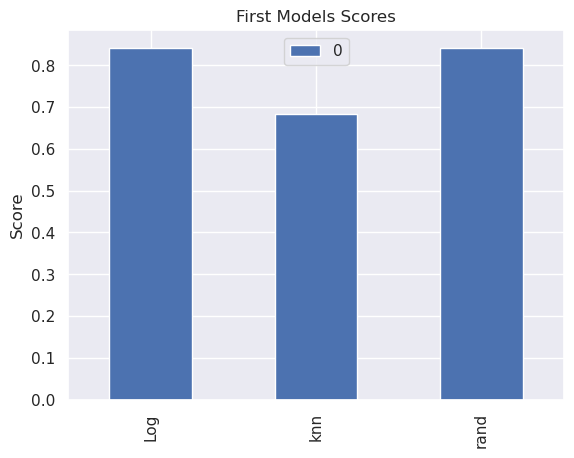

In [37]:
df1 = pd.DataFrame(first_scores, 
                  index=[0]).T
df1.plot(kind='bar')
plt.title('First Models Scores')
plt.ylabel('Score')

In [38]:
df2 = pd.DataFrame({
    'LogReg': log_rs,
    'KNN': kn_rs,
    'RanForst': r_rs},
                   index=[0]
)
df2

,LogReg,KNN,RanForst
0,0.868421,0.697368,0.868421


Text(0.5, 1.0, 'First RandomizedSearchCV Scores')

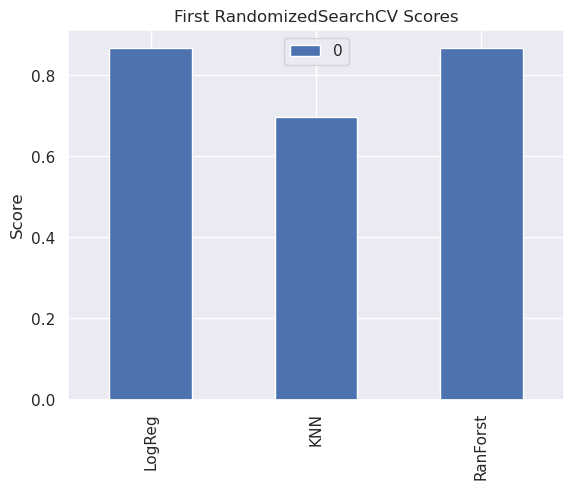

In [42]:
df2.T.plot(kind='bar')
plt.ylabel('Score')
plt.title('First RandomizedSearchCV Scores')

### Tune 2 

Using GridSearchCV

In [ ]:
%%time
# KNN
kn_tune = {
    'n_neighbors': np.arange(1, 51),
    'leaf_size': np.arange(1, 61),
    'weights': ['uniform','distance'],
}

kn_gs = GridSearchCV(KNeighborsClassifier(),
                     cv=5,
                    param_grid=kn_tune,
                    )
kn_gs.fit(X_train, y_train)

### Evaluations
1. Feature Importance
2. Confusion metrics
3. Roc curve amd auc curve
4. f1 score
5. cross validation score
6. precision score
7. recall
8. classification report

In [124]:
from sklearn.metrics import confusion_matrix,\
f1_score, recall_score, classification_report, auc

from sklearn.model_selection import cross_val_score
from sklearn.metrics import roc_curve, RocCurveDisplay

In [63]:
# classification report for LogisticRegression RSCV
ypred = log_rss.predict(X_test)

print(classification_report(y_test,
                     ypred))

              precision    recall  f1-score   support

           0       0.86      0.86      0.86        35
           1       0.88      0.88      0.88        41

    accuracy                           0.87        76
   macro avg       0.87      0.87      0.87        76
weighted avg       0.87      0.87      0.87        76



In [69]:
# plot recall_score
recall_score(y_test, ypred)

0.8780487804878049

In [72]:
cm = confusion_matrix(y_test, ypred)
cm

array([[30,  5],
       [ 5, 36]], dtype=int64)

Text(0.5, 1.0, 'Confusion Metrics for LogisticRegression RSCV')

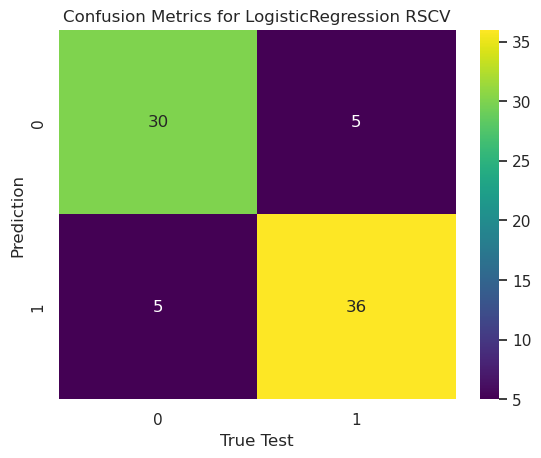

In [81]:
sns.heatmap(cm,
           cmap='viridis',
           annot=True)
plt.xlabel('True Test')
plt.ylabel('Prediction')
plt.title('Confusion Metrics for LogisticRegression RSCV')

In [83]:
log_r = LogisticRegression(C=4.88737461624424,
                          solver='lbfgs',
                          penalty='l2')
log_r.fit(X_train, y_train)

LogisticRegression(C=4.88737461624424)

In [99]:
lg = log_r.coef_[0]
lg

array([ 0.02209465, -1.29588543,  0.77440206, -0.02368243, -0.00175956,
        0.15438744,  0.81396129,  0.03125416, -0.82799019, -0.50159871,
        0.84983987, -0.82616226, -1.09454778])

In [102]:
column = df.columns
feature_imp = dict(zip(column, list(lg)))
feature_imp

{'age': 0.022094647285925435,
 'sex': -1.295885434035242,
 'cp': 0.7744020556883969,
 'trestbps': -0.023682428045798256,
 'chol': -0.0017595559180745627,
 'fbs': 0.15438744290149992,
 'restecg': 0.8139612937732976,
 'thalach': 0.03125415511761756,
 'exang': -0.8279901885656351,
 'oldpeak': -0.5015987080909527,
 'slope': 0.8498398703209745,
 'ca': -0.8261622577447737,
 'thal': -1.0945477830547659}

Text(0.5, 1.0, 'Feature Importance of LogisticRegression')

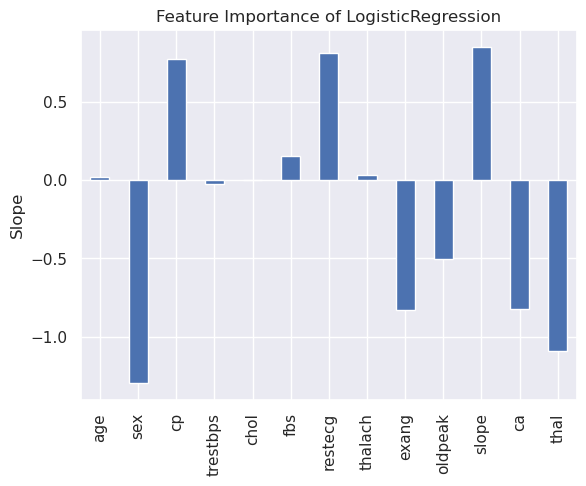

In [107]:
pd.DataFrame(feature_imp, index=[0]).T.plot(kind='bar', legend=False)
plt.ylabel('Slope')
plt.title('Feature Importance of LogisticRegression')

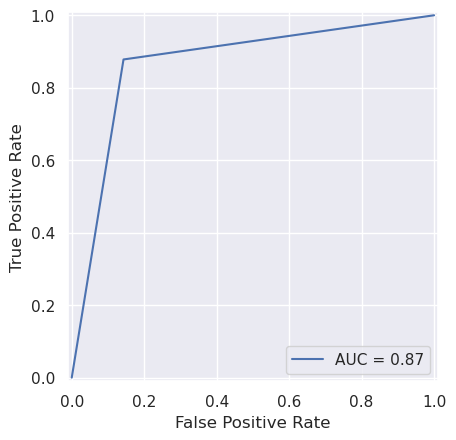

In [132]:
fpr, tpr, thresdholds = roc_curve(y_test, ypred)
roc_auc = auc(fpr, tpr)
RocCurveDisplay(fpr=fpr, tpr=tpr, roc_auc=roc_auc).plot()
plt.show()

### This is where I will stop the hyperparameter tuning due to processing issue


To be continue...